In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from functions import *
import seaborn as sns
import numpy as np

In [2]:
df = adjust_dataframe(get_dataframe("../csv_files/"))

In [3]:
df

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Prob
0,er_100_160_0.csv,6400,"[3, 5, 7, 11, 12, 16, 18, 19, 20, 21, 25, 26, ...",39,160,12720,92.661339,10,60,0.5,6,100
1,er_70_120_1.csv,2555,"[11, 12, 13, 14, 20, 22, 25, 33, 0, 1, 2, 3, 4...",52,120,5028,144.659320,10,60,0.5,6,70
2,er_90_120_1.csv,3250,"[1, 3, 4, 6, 9, 12, 13, 14, 16, 18, 19, 20, 24...",59,120,6431,143.901366,10,60,0.5,6,90
3,er_80_200_3.csv,8072,"[0, 2, 5, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19,...",55,200,15946,309.696353,10,60,0.5,6,80
4,er_80_160_1.csv,5072,"[0, 1, 2, 3, 7, 14, 17, 18, 24, 25, 26, 27, 28...",54,160,10223,252.428979,10,60,0.5,6,80
...,...,...,...,...,...,...,...,...,...,...,...,...
395,er_80_80_3.csv,1296,"[2, 3, 11, 15, 16, 19, 20, 21, 24, 25, 26, 27,...",33,80,2522,61.293880,10,60,0.5,6,80
396,er_60_80_1.csv,964,"[1, 9, 8, 3, 4, 6, 14, 15, 17, 20, 22, 26, 28,...",16,80,1886,46.856714,10,60,0.5,6,60
397,er_70_160_0.csv,4526,"[1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 17, 19, 21, 2...",56,160,8925,214.154493,10,60,0.5,6,70
398,er_80_120_1.csv,2861,"[0, 1, 2, 4, 5, 6, 8, 9, 11, 13, 16, 17, 18, 2...",55,120,5693,71.774650,1,60,0.5,6,80


In [4]:
dataframe_statistics(df, "vertices", ["cuts","vertices"]) 

cuts                                                            \
         count       mean          std     min      25%     50%      75%   
vertices                                                                   
40        80.0   327.3625    53.595589   242.0   279.00   329.0   370.00   
80        80.0  1282.7875   226.223128   937.0  1111.25  1290.5  1454.00   
120       80.0  2868.8125   510.632274  1939.0  2492.75  2882.5  3270.50   
160       80.0  5088.1375   919.347812  3737.0  4449.25  5104.0  5788.75   
200       80.0  7753.3375  1728.832868   139.0  6746.25  8003.5  9028.25   

                   
              max  
vertices           
40          400.0  
80         1600.0  
120        3600.0  
160        6400.0  
200       10000.0

In [5]:
df[["cuts", "vertices"]].groupby("vertices").describe()

cuts                                                            \
         count       mean          std     min      25%     50%      75%   
vertices                                                                   
40        80.0   327.3625    53.595589   242.0   279.00   329.0   370.00   
80        80.0  1282.7875   226.223128   937.0  1111.25  1290.5  1454.00   
120       80.0  2868.8125   510.632274  1939.0  2492.75  2882.5  3270.50   
160       80.0  5088.1375   919.347812  3737.0  4449.25  5104.0  5788.75   
200       80.0  7753.3375  1728.832868   139.0  6746.25  8003.5  9028.25   

                   
              max  
vertices           
40          400.0  
80         1600.0  
120        3600.0  
160        6400.0  
200       10000.0

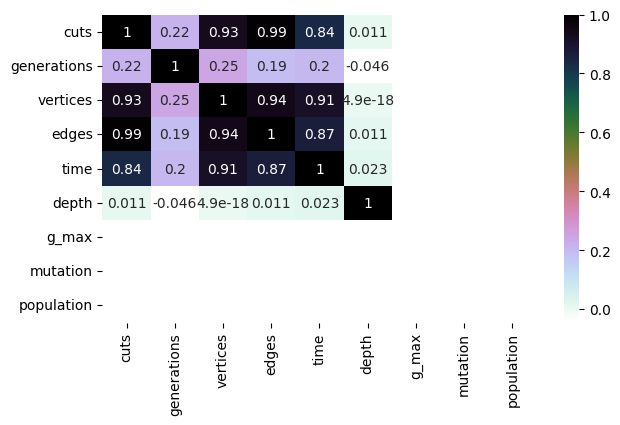

In [6]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

In [7]:
sdp = pd.read_csv("../sdp-data.csv")

In [50]:
df_n = pd.read_csv("../csv_files/data-p3.csv")

In [8]:
sweep = pd.read_csv("../sweep_cuts.csv")

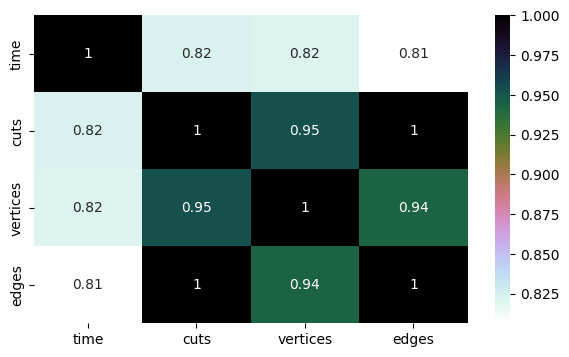

In [9]:
plt.figure(figsize=(7,4)) 
sns.heatmap(sdp.corr(),annot=True,cmap='cubehelix_r')
plt.savefig("HeatMapCorr")
plt.show()

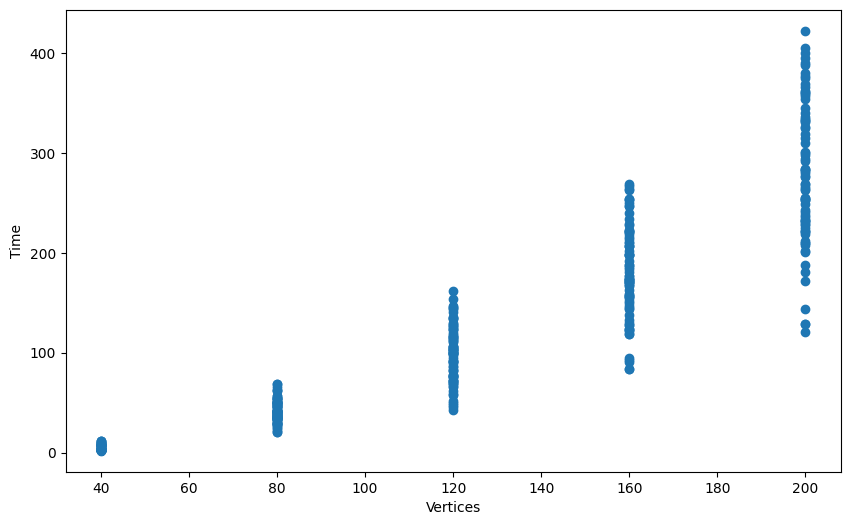

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['vertices'], y = df['time'])
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

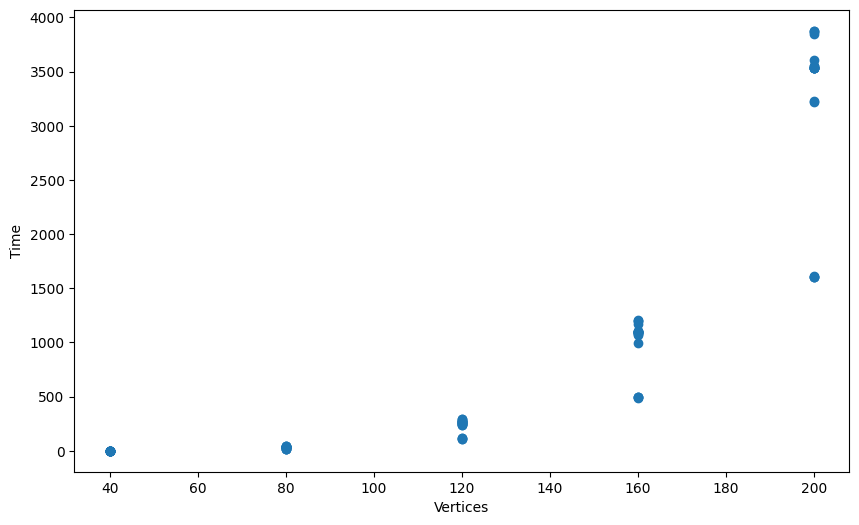

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = sdp['vertices'], y = sdp['time'])
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

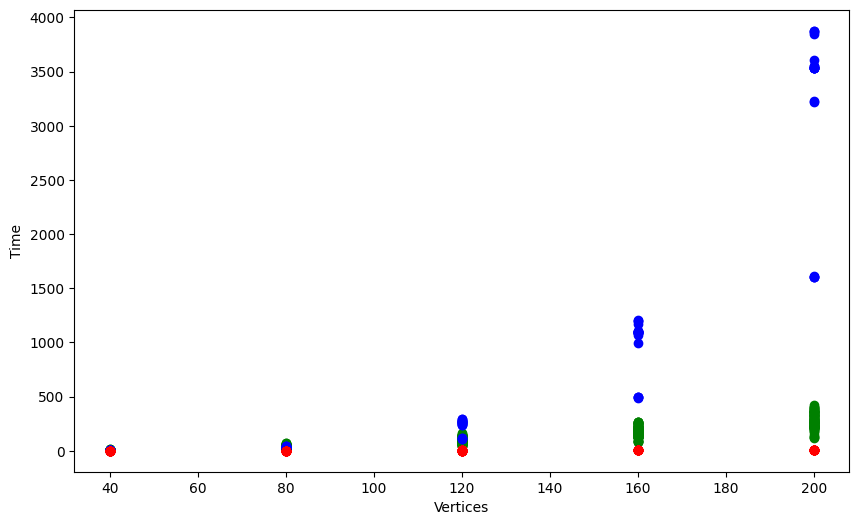

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['vertices'], y = df['time'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp['vertices'], y = sdp['time'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

ax.scatter(x = sweep['vertices'], y = sweep['time'], color='r')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

In [13]:
df['Prob'] = df['Prob'].apply( lambda x: int(x) )

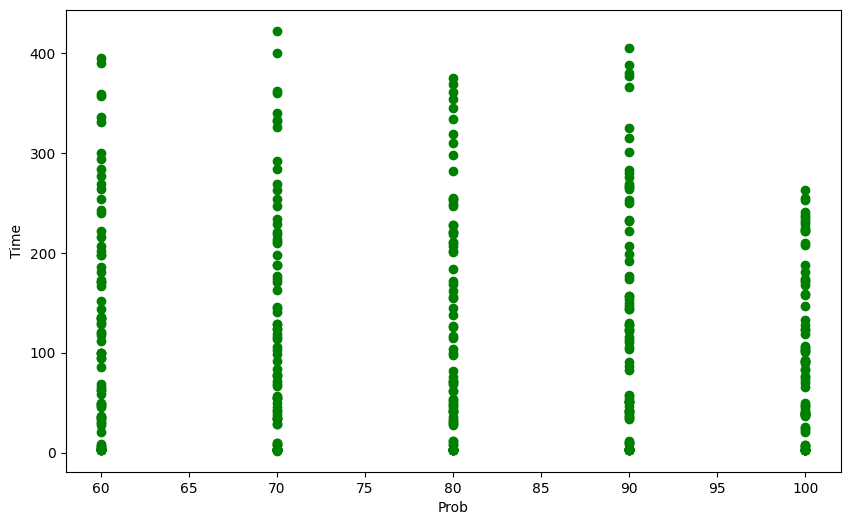

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Prob'], y = df['time'], color='g')
plt.xlabel("Prob")
plt.ylabel("Time")
plt.show()

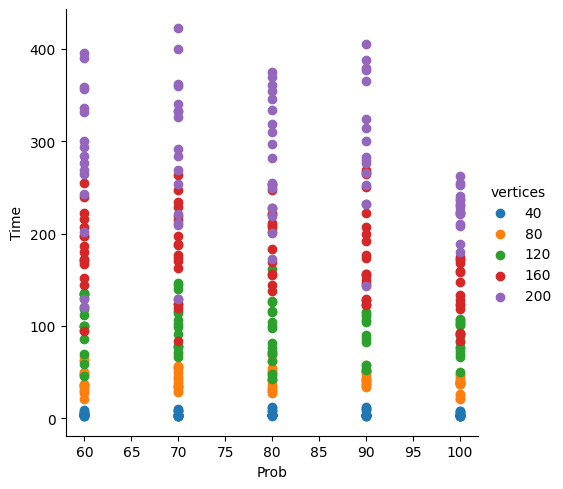

In [15]:
sns.FacetGrid(df, hue="vertices", height=5) \
   .map(plt.scatter, "Prob", "time") \
   .add_legend()
plt.xlabel("Prob")
plt.ylabel("Time")
plt.show()

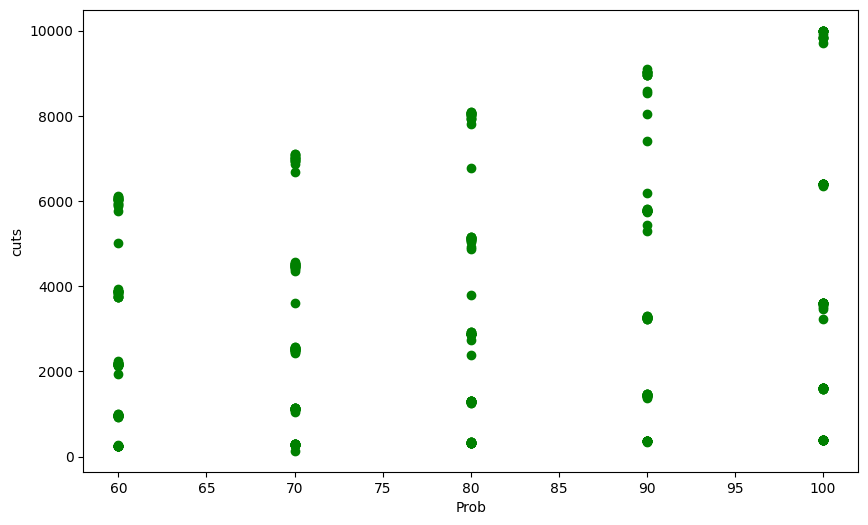

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Prob'], y = df['cuts'], color='g')
plt.xlabel("Prob")
plt.ylabel("cuts")
plt.show()

In [17]:
df_mean = df[["cuts", "graph"]].groupby("graph").mean()

In [18]:
df_mean["mean-cut"] = df_mean["cuts"]

In [19]:
df_mean = df_mean.drop("cuts", axis=1)

In [20]:
df_mean

,mean-cut
graph,
er_100_120_0.csv,3599.00
er_100_120_1.csv,3597.75
er_100_120_2.csv,3541.50
er_100_120_3.csv,3494.50
er_100_160_0.csv,6391.50
...,...
er_90_40_3.csv,360.50
er_90_80_0.csv,1434.00
er_90_80_1.csv,1429.75


In [21]:
df_teste = sdp.merge(df_mean, on=['graph','graph'], how='right')

In [22]:
df_teste

,time,cuts,graph,vertices,edges,mean-cut
0,112.360686,3590,er_100_120_0.csv,120,7140,3599.00
1,112.259985,3589,er_100_120_1.csv,120,7140,3597.75
2,121.356712,3589,er_100_120_2.csv,120,7140,3541.50
3,121.266138,3587,er_100_120_3.csv,120,7140,3494.50
4,495.403952,6386,er_100_160_0.csv,160,12720,6391.50
...,...,...,...,...,...,...
95,2.469144,382,er_90_40_3.csv,40,707,360.50
96,45.822250,1494,er_90_80_0.csv,80,2819,1434.00
97,38.571160,1492,er_90_80_1.csv,80,2828,1429.75
98,41.763594,1508,er_90_80_2.csv,80,2867,1443.00


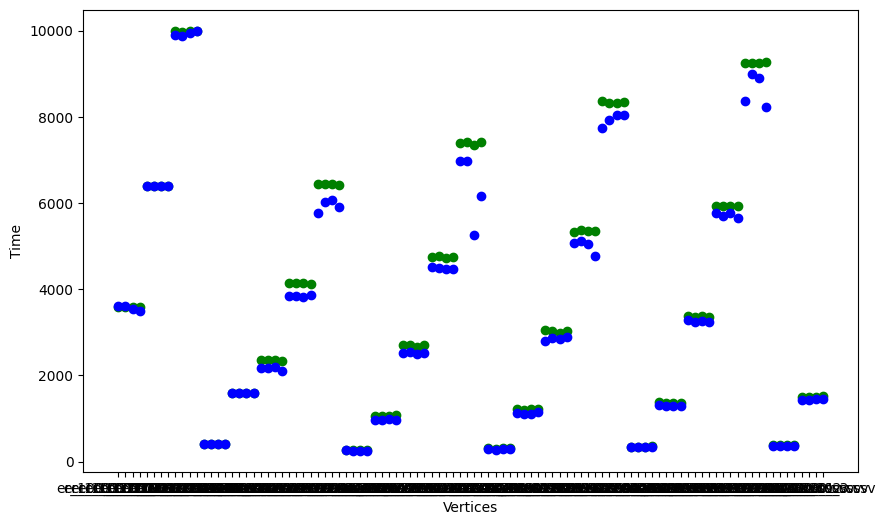

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_teste['graph'], y = df_teste['cuts'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = df_teste['graph'], y = df_teste['mean-cut'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

In [33]:
df_prob = df[['graph', 'Prob']]

In [34]:
sdp_prob = sdp.merge(df_prob, on=['graph','graph'], how='right')

In [35]:
sdp_100 = sdp[ sdp_prob["Prob"] == 100 ]

/tmp/ipykernel_17676/242254486.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sdp_100 = sdp[ sdp_prob["Prob"] == 100 ]


In [37]:
sdp_100

,time,cuts,graph,vertices,edges
0,495.403952,6386,er_100_160_0.csv,160,12720
24,17.091828,1593,er_100_80_0.csv,80,3160
36,1614.153427,9982,er_100_200_3.csv,200,19900
38,484.263180,6383,er_100_160_3.csv,160,12720
42,17.133054,1593,er_100_80_1.csv,80,3160
46,1607.999197,9979,er_100_200_1.csv,200,19900
52,1.136815,397,er_100_40_3.csv,40,780
57,16.719480,1593,er_100_80_2.csv,80,3160
58,121.266138,3587,er_100_120_3.csv,120,7140
59,16.872294,1593,er_100_80_3.csv,80,3160


In [41]:
df

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Prob
0,er_100_160_0.csv,6400,"[3, 5, 7, 11, 12, 16, 18, 19, 20, 21, 25, 26, ...",39,160,12720,92.661339,10,60,0.5,6,100
1,er_70_120_1.csv,2555,"[11, 12, 13, 14, 20, 22, 25, 33, 0, 1, 2, 3, 4...",52,120,5028,144.659320,10,60,0.5,6,70
2,er_90_120_1.csv,3250,"[1, 3, 4, 6, 9, 12, 13, 14, 16, 18, 19, 20, 24...",59,120,6431,143.901366,10,60,0.5,6,90
3,er_80_200_3.csv,8072,"[0, 2, 5, 6, 8, 9, 10, 11, 13, 15, 16, 18, 19,...",55,200,15946,309.696353,10,60,0.5,6,80
4,er_80_160_1.csv,5072,"[0, 1, 2, 3, 7, 14, 17, 18, 24, 25, 26, 27, 28...",54,160,10223,252.428979,10,60,0.5,6,80
...,...,...,...,...,...,...,...,...,...,...,...,...
395,er_80_80_3.csv,1296,"[2, 3, 11, 15, 16, 19, 20, 21, 24, 25, 26, 27,...",33,80,2522,61.293880,10,60,0.5,6,80
396,er_60_80_1.csv,964,"[1, 9, 8, 3, 4, 6, 14, 15, 17, 20, 22, 26, 28,...",16,80,1886,46.856714,10,60,0.5,6,60
397,er_70_160_0.csv,4526,"[1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 17, 19, 21, 2...",56,160,8925,214.154493,10,60,0.5,6,70
398,er_80_120_1.csv,2861,"[0, 1, 2, 4, 5, 6, 8, 9, 11, 13, 16, 17, 18, 2...",55,120,5693,71.774650,1,60,0.5,6,80


In [42]:
df_100 = df[ df["Prob"] == 100 ]

In [43]:
df_100

,graph,cuts,best_partition,generations,vertices,edges,time,depth,g_max,mutation,population,Prob
0,er_100_160_0.csv,6400,"[3, 5, 7, 11, 12, 16, 18, 19, 20, 21, 25, 26, ...",39,160,12720,92.661339,10,60,0.5,6,100
24,er_100_80_0.csv,1600,"[1, 5, 22, 25, 26, 29, 3, 4, 6, 7, 10, 11, 16,...",25,80,3160,39.399218,10,60,0.5,6,100
36,er_100_200_3.csv,9999,"[5, 2, 4, 6, 9, 12, 14, 17, 18, 19, 22, 24, 25...",38,200,19900,188.166057,10,60,0.5,6,100
38,er_100_160_3.csv,6400,"[3, 10, 11, 13, 14, 21, 22, 25, 27, 28, 29, 30...",52,160,12720,147.193311,10,60,0.5,6,100
42,er_100_80_1.csv,1591,"[17, 3, 4, 6, 7, 10, 11, 13, 16, 18, 23, 30, 3...",27,80,3160,38.540096,10,60,0.5,6,100
...,...,...,...,...,...,...,...,...,...,...,...,...
379,er_100_160_2.csv,6400,"[3, 10, 11, 13, 14, 21, 22, 25, 27, 28, 29, 30...",28,160,12720,83.902869,10,60,0.5,6,100
386,er_100_160_1.csv,6391,"[16, 26, 3, 10, 11, 13, 14, 21, 22, 25, 29, 30...",53,160,12720,172.594996,10,60,0.5,6,100
387,er_100_40_1.csv,399,"[3, 5, 7, 8, 9, 10, 11, 19, 21, 24, 25, 27, 22...",24,40,780,3.117602,10,60,0.5,6,100
389,er_100_120_1.csv,3600,"[1, 2, 3, 5, 8, 12, 14, 15, 16, 17, 18, 21, 25...",55,120,7140,69.868086,10,60,0.5,6,100


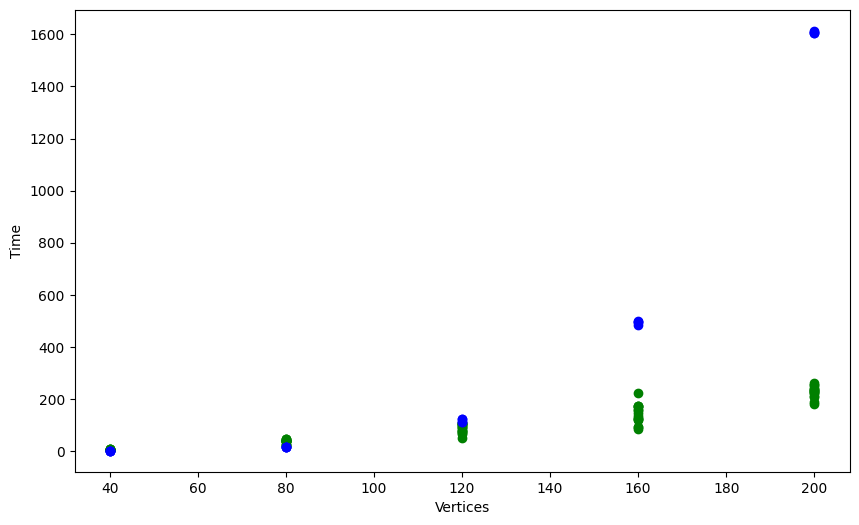

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_100['vertices'], y = df_100['time'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp_100['vertices'], y = sdp_100['time'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

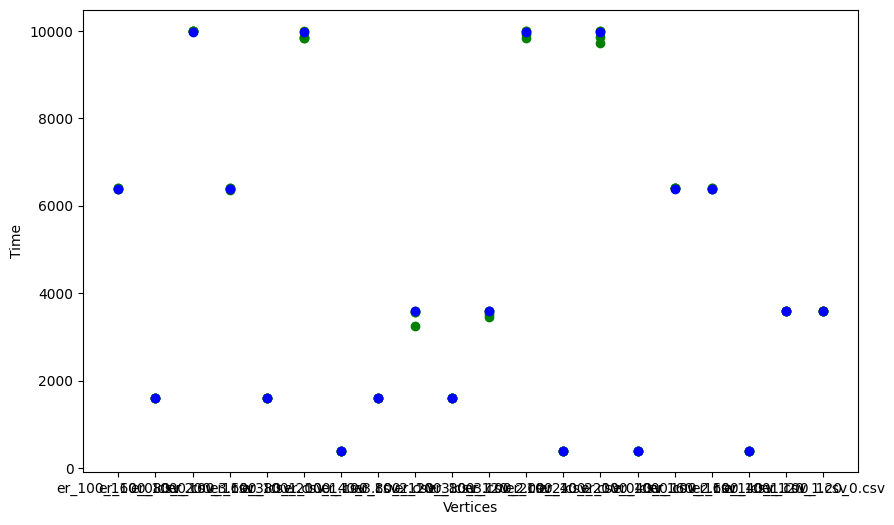

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_100['graph'], y = df_100['cuts'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sdp_100['graph'], y = sdp_100['cuts'], color='b')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

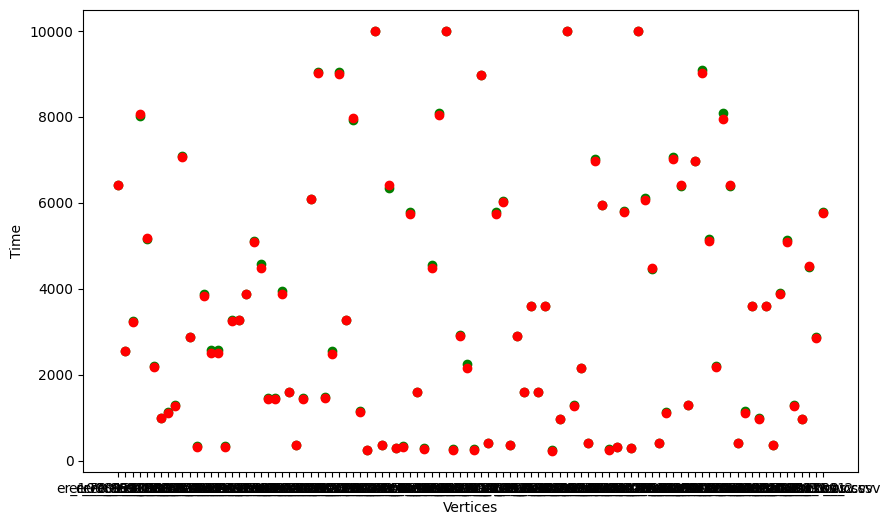

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_n['graph'], y = df_n['cuts'], color='g')
plt.xlabel("Vertices")
plt.ylabel("Time")
ax.scatter(x = sweep['graph'], y = sweep['cuts'], color='r')
plt.xlabel("Vertices")
plt.ylabel("Time")

plt.show()

In [56]:
x = df_n['cuts'] - sweep['cuts']
list(x)

[0,
 4,
 22,
 -52,
 -14,
 31,
 4,
 31,
 24,
 33,
 2,
 18,
 37,
 76,
 72,
 15,
 16,
 -11,
 0,
 15,
 81,
 20,
 16,
 76,
 0,
 2,
 20,
 7,
 10,
 28,
 70,
 51,
 5,
 -32,
 19,
 19,
 0,
 6,
 -49,
 9,
 11,
 56,
 0,
 8,
 71,
 41,
 0,
 13,
 27,
 80,
 16,
 -5,
 0,
 45,
 17,
 10,
 -1,
 0,
 0,
 0,
 -9,
 17,
 -3,
 -9,
 30,
 7,
 0,
 42,
 0,
 18,
 17,
 17,
 8,
 0,
 41,
 -13,
 0,
 14,
 46,
 -1,
 4,
 4,
 78,
 51,
 24,
 143,
 -9,
 0,
 35,
 -9,
 17,
 0,
 1,
 8,
 52,
 20,
 6,
 -19,
 13,
 35]

In [64]:
a = 0
for i in x:
    
    if i == 0:
        a += 1
print(a)
        

16


In [3]:
df = pd.read_csv("../csv_files/grid_search_paulo_1.csv")

In [16]:
len(df.index)

37

In [17]:
x = (1,2)

In [19]:
for i in x:
    print(i)

1
2
